In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('auto-mpg.csv')

In [3]:
print("\nDataset Info: ")
df.info()


Dataset Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [4]:
print("First 9 rows: ")
df.head()

First 9 rows: 


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
print("Describe dataset: ")
df.describe()

Describe dataset: 


,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
print("Shapes of dataset: ")
df.shape

Shapes of dataset: 


(398, 9)

In [7]:
print("Nan values of dataset: ")
df.isnull().sum()

Nan values of dataset: 


,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0
car name,0


In [8]:
print("We'll replace missing values (denoted by '?')")
df = df.replace('?', pd.NA)


We'll replace missing values (denoted by '?')


In [9]:
print("Remove any rows with missing data, and convert columns to numerical types")
df = df.dropna()

Remove any rows with missing data, and convert columns to numerical types


In [10]:
df['horsepower'] = df['horsepower'].astype(float)

In [11]:
print(df.columns)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')


In [12]:
y = df['mpg'].values
X = df.drop('mpg', axis=1)

In [13]:
X =  df.select_dtypes(include=[np.number])
y = X.pop('mpg').values

In [14]:
X = (X - X.mean(axis=0)) / X.std(axis=0)
y = (y - y.mean()) / y.std()

In [15]:
X = np.c_[np.ones(X.shape[0]), X]

In [16]:
theta = np.random.randn(X.shape[1])
print("Initial theta:", theta)

Initial theta: [ 1.36292762  0.78157831  0.62635249  0.42736967 -1.84425075 -0.14270879
 -0.77412762  0.79149417]


In [17]:
def predict(X, theta):
  return np.dot(X, theta)

In [18]:
def gardeint_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        predictions = np.dot(X, theta)
        errors = predictions - y
        gradient = (1/m) * np.dot(X.T, errors)
        theta -= learning_rate * gradient
        cost = (1/(2*m)) * np.sum(errors**2)
        cost_history.append(cost)

    return theta, cost_history

In [19]:
theta, cost_history = gardeint_descent(X, y, theta, learning_rate=0.01, iterations=1000)
print("Final Parameters:", theta)

Final Parameters: [ 5.88392856e-05  1.66751678e-01  3.91453375e-01  1.62599312e-01
 -1.25408183e+00  1.75518023e-01  3.89806966e-01  1.34873043e-01]


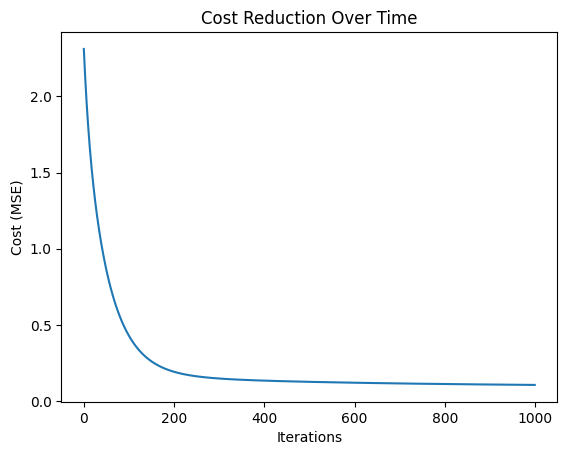

In [20]:
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Cost Reduction Over Time")
plt.show()

In [21]:
predictions = predict(X, theta)
print("R² Score:", r2_score(y, predictions))

R² Score: 0.789316383724509


Text(0.5, 1.0, 'Predicted vs Actual MPG Values')

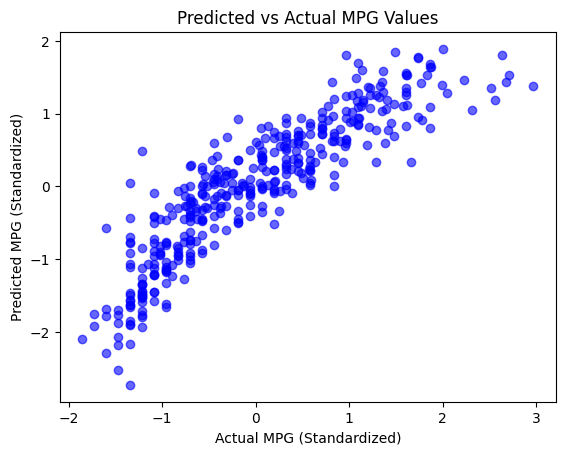

In [22]:
plt.scatter(y, predictions, color='blue', alpha=0.6)
plt.xlabel('Actual MPG (Standardized)')
plt.ylabel('Predicted MPG (Standardized)')
plt.title('Predicted vs Actual MPG Values')

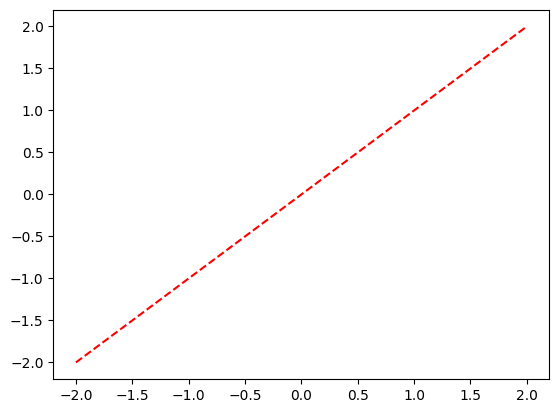

In [23]:
plt.plot([-2, 2], [-2, 2], color='red', linestyle='--')
plt.show()